<a href="https://colab.research.google.com/github/jrfanfan/Android_temp_con/blob/main/Copy_of_starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:

df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv').sample(frac = 0.11111710593757587202244463028406))
df.shape
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32716,23,student,single,high.school,no,no,no,telephone,jun,tue,4,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
34961,56,management,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5,no
6936,44,technician,married,professional.course,no,no,no,telephone,may,fri,3,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
22419,39,self-employed,married,university.degree,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
4863,48,services,married,professional.course,no,yes,no,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15318,22,blue-collar,married,basic.9y,no,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3798,47,blue-collar,married,basic.4y,no,yes,no,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
17209,33,admin.,married,university.degree,no,no,yes,cellular,aug,tue,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
34077,30,student,married,university.degree,no,yes,no,cellular,aug,mon,3,3,1,success,-2.9,92.201,-31.4,0.821,5076.2,yes


In [4]:
# the number of single people and students that wasn’t subscribed to a term deposit yet.
no_term_single_student = df[(df['marital']== 'single') & (df['job']=='student') & (df['y']=='no')]
no_term_single_student.count()

,0
age,56
job,56
marital,56
education,56
default,56
housing,56
loan,56
contact,56
month,56
day_of_week,56


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='marital', ylabel='count'>

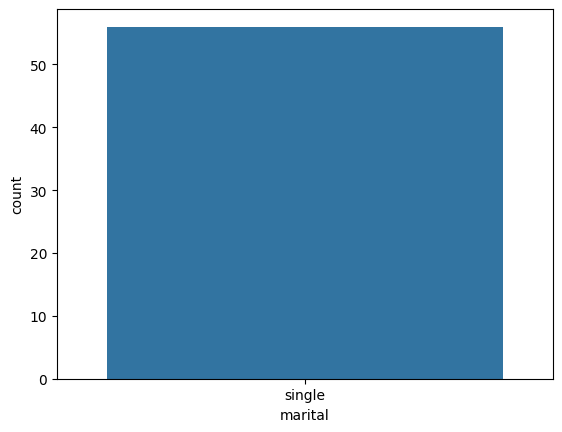

In [6]:
sns.countplot(x='marital', data=no_term_single_student)

<Axes: xlabel='marital', ylabel='job'>

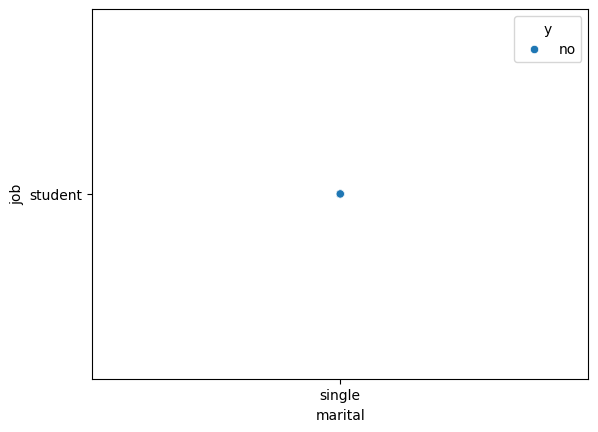

In [7]:
sns.scatterplot(data=no_term_single_student, x='marital', y='job', hue='y')

In [8]:
part_campaign = no_term_single_student[no_term_single_student['campaign'] < 10]

<Axes: xlabel='campaign,y'>

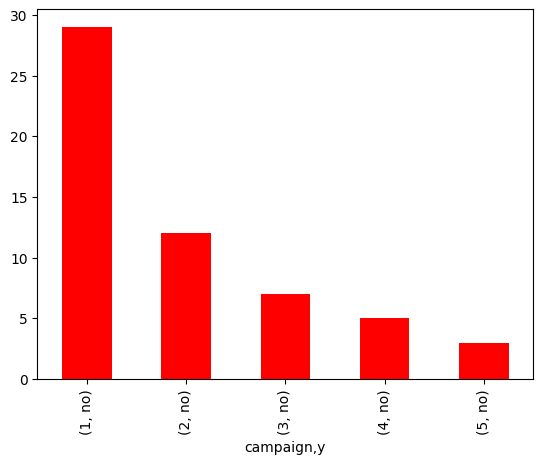

In [9]:
# Use Altair to create a bar chart comparing the count of each movie rating
no_term_single_student[['campaign', 'y']].value_counts().plot.bar(color='red')

<Axes: xlabel='emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed'>

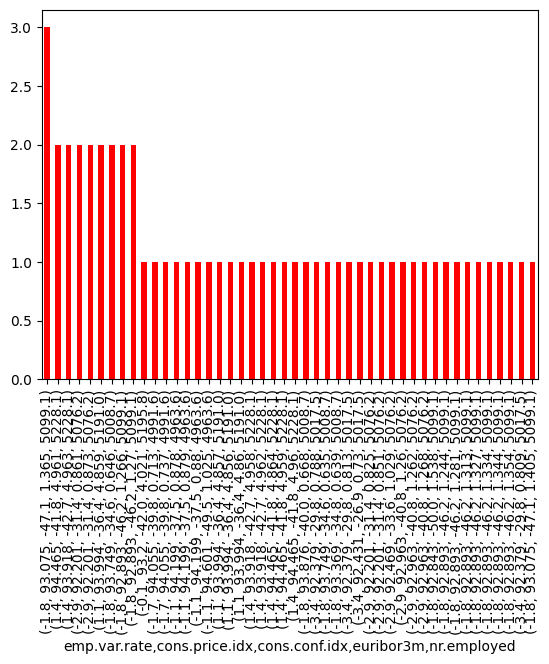

In [10]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions
X = no_term_single_student[['emp.var.rate',	'cons.price.idx',	'cons.conf.idx', 	'euribor3m', 	'nr.employed']]
X[['emp.var.rate',	'cons.price.idx',	'cons.conf.idx', 	'euribor3m', 	'nr.employed']].value_counts().plot.bar(color='red')

In [11]:
# Create a new dataframe called y that contians the target we're
# trying to predict
y = no_term_single_student['y']

In [12]:
# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [13]:
X_train

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27616,-1.8,92.893,-46.2,1.344,5099.1
33331,-2.9,92.469,-33.6,1.029,5076.2
12497,1.4,93.918,-42.7,4.963,5228.1
32549,-1.8,92.893,-46.2,1.270,5099.1
33945,-2.9,92.201,-31.4,0.851,5076.2
33729,-2.9,92.201,-31.4,0.873,5076.2
31008,-1.8,92.893,-46.2,1.266,5099.1
36904,-1.1,94.601,-49.5,1.025,4963.6
35458,-1.8,93.749,-34.6,0.635,5008.7
36751,-1.1,94.199,-37.5,0.880,4963.6


In [14]:
y_train

,y
27616,no
33331,no
12497,no
32549,no
33945,no
33729,no
31008,no
36904,no
35458,no
36751,no


In [210]:
X_test

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25408,-1.8,93.075,-47.1,1.453,5099.1
13675,1.4,93.918,-42.7,4.958,5228.1
186,1.1,93.994,-36.4,4.857,5191.0
33945,-2.9,92.201,-31.4,0.851,5076.2
35622,-1.8,93.876,-40.0,0.668,5008.7
26294,-1.8,93.075,-47.1,1.405,5099.1
36128,-1.7,94.215,-40.3,0.840,4991.6
30728,-1.8,92.893,-46.2,1.281,5099.1
12841,1.4,93.918,-42.7,4.962,5228.1
26830,-1.8,93.075,-47.1,1.405,5099.1


In [211]:
y_test

,y
25408,no
13675,no
186,no
33945,no
35622,no
26294,no
36128,no
30728,no
12841,no
26830,no


In [15]:
# Import the KNeighborsClassifier class from sklearn
# Note that it's in the neighbors submodule. See the example code in the
# documentation for details on how to import it
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Create an instance of the model, configuring it to use the 3 nearest neighbors
# store the instance in a variable
clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
# Call the "fit" method of the classifier instance we created in step 4.
# Pass it the X_train and y_train data so that it can learn to make predictions
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [134]:
# Use the predict() method to get a list of predictions for the samples in our
# test data. Then output those predictions
#convert to cvs
def num(x):
  return x.replace('no', '0')

predictions = clf.predict(X_test)
xt = pd.DataFrame(predictions)
xt[0] = xt[0].apply(num)
xy = 'Predictions\n' + xt[0].to_string(index=False)
print(xy)




Predictions
0
0
0
0
0
0
0
0
0
0
0
0


In [24]:
# Just a quick comparison with y_test to see if they match up
predictions == y_test

,y
29027,True
34594,True
35842,True
3826,True
33068,True
27447,True
7539,True
32916,True
34200,True
34130,True


In [236]:
# Import the accuracy_score function and use it to determine
# how accurate the models predictions were for our test data
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test, predictions)

1.0

In [234]:
# Import the confusion_matrix function and use it to generate a confusion
# matrix of our model results.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[12]])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

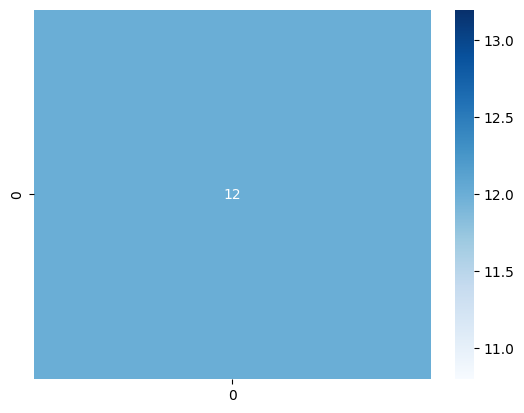

In [235]:
# Create a Seaborn heatmap
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')